## LAB 1

In [71]:
from math import pi, e, cos, sqrt, factorial, floor, erf
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import comb
import random

# Exercise 1

In [57]:
def get_generator_values(n, generator_func, init_func, change_seed_func):
    generated = []
    values = init_func()
    for i in range(0, n):
        seed, x  = generator_func(*values)
        values = change_seed_func(seed)
        generated.append(x)
    return generated
        

In [58]:
def linear_generator(a1, a0, m, seed=0):
    x = (a1 * seed + a0) % m
    return x, x/(m-1)
    
def init_linear_generator(seed):
    a1, a0 =  pi * 10 ** 9, e * 10 ** 9, 
    m = 2 ** 35 
    return a1, a0, m, seed

def change_linear_generator_seed(seed):
    return init_linear_generator(seed)

<module 'matplotlib.pyplot' from '/home/stanislaw/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

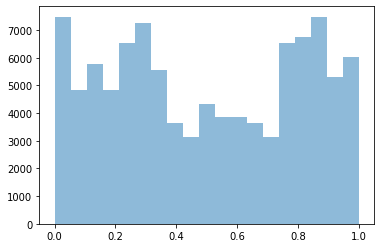

In [67]:
generated_linear = get_generator_values(100000,
                                        linear_generator,
                                        lambda: init_linear_generator(seed=0),
                                        change_linear_generator_seed)

bins = np.linspace(0, 1, 20)
plt.hist(generated_linear, bins=bins, alpha=0.5)
plt

# Exercise 5 (Connected with ex. 1)

In [62]:
def init_JKISS_generator():
    x = 123456789
    y = 987654321
    z = 43219876
    c = 6543217
    m = 2**32
    return x, y, z, c, m

def JKISS_generator(x, y, z, c, m):
    x = to_int32(to_int32(314527869 * x) + 1234567)
    y ^= to_int32(y << 5)
    y ^= y >> 7
    y ^= to_int32(y << 22)
    t = ((4294584393 * z) % (2 ** 64) + c) % (2 ** 64)
    c = t >> 32
    z = to_int32(t)
    return [x, y, z, c, m], to_int32(x + y + z)/(m-1)

def to_int32(number):
    return number % (2 ** 32)

def change_JKISS_generator_seed(values):
    return values



<module 'matplotlib.pyplot' from '/home/stanislaw/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

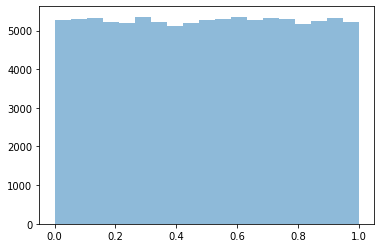

In [68]:
generated_JKISS = get_generator_values(100000,
                    JKISS_generator,
                    init_JKISS_generator,
                    change_JKISS_generator_seed)
bins = np.linspace(0, 1, 20)
plt.hist(generated_JKISS, bins=bins, alpha=0.5)
plt

Time comparison

In [72]:
random.random()

0.9778941083851321

# Exercise 2

In [11]:
def f(x):
    return (1 + cos(x) * e ** ((-x ** 2) / 2)) / (1 + e ** (-1 / 2) * sqrt(2 * pi))

def f_generator(a, b, d):
    x = np.random.uniform(a, b)
    y = np.random.uniform(0, d)
    if y > f(x):
        x = f_generator(a, b, d)
    return x

<module 'matplotlib.pyplot' from '/home/stanislaw/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

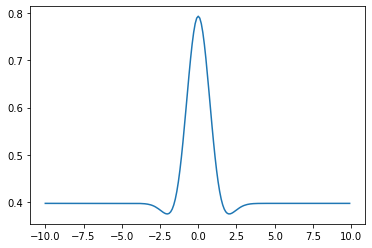

In [13]:
data = np.arange(-10, 10, 0.1)
f_data = np.array([f(x) for x in data])
plt.plot(data, f_data)
plt


<module 'matplotlib.pyplot' from '/home/stanislaw/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

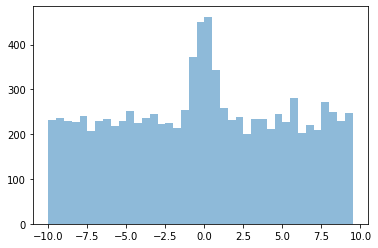

In [14]:
data = np.arange(-10, 10, 0.5)
f_data = np.array([f_generator(-10, 10, 0.8) for x in range(0, 10000)])
plt.hist(f_data, bins=data, alpha=0.5)
plt

# Exercise 3

In [15]:
def poisson_pmf(lbda, k):
    return (lbda ** k * e ** (-lbda)) / factorial(k)


def poisson_cdf(lbda, k):
    result = 0
    if k >= 0:
        result = poisson_pmf(lbda, k) + poisson_cdf(lbda, k - 1)
    return result


def poisson_generator1(lbda):
    x = np.random.uniform(0, 1)
    result = 0
    while (poisson_cdf(lbda, result - 1) > x) or (poisson_cdf(lbda, result) <= x):
        result += 1
    return result


def poisson_generator2(lbda):
    k = 0
    p = 1
    L = e ** (-lbda)
    while p >= L:
        k = k+1
        p = p* np.random.uniform(0,1)
    return k-1

1. First option

<module 'matplotlib.pyplot' from '/home/stanislaw/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

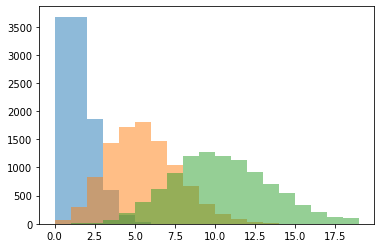

In [22]:

data = np.arange(0, 20, 1)
lbda1 = np.array([poisson_generator1(1) for x in range(0, 10000)])
lbda5 = np.array([poisson_generator1(5) for x in range(0, 10000)])
lbda10 = np.array([poisson_generator1(10) for x in range(0, 10000)])
plt.hist(lbda1, bins=data, alpha=0.5)
plt.hist(lbda5, bins=data, alpha=0.5)
plt.hist(lbda10, bins=data, alpha=0.5)
plt

2. Second option

<module 'matplotlib.pyplot' from '/home/stanislaw/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

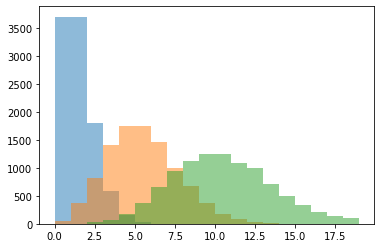

In [24]:
data = np.arange(0, 20, 1)
lbda1 = np.array([poisson_generator2(1) for x in range(0, 10000)])
lbda5 = np.array([poisson_generator2(5) for x in range(0, 10000)])
lbda10 = np.array([poisson_generator2(10) for x in range(0, 10000)])
plt.hist(lbda1, bins=data, alpha=0.5)
plt.hist(lbda5, bins=data, alpha=0.5)
plt.hist(lbda10, bins=data, alpha=0.5)
plt

# Exercise 4

<module 'matplotlib.pyplot' from '/home/stanislaw/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

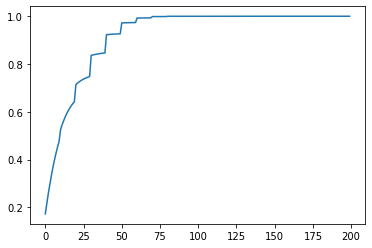

In [27]:
def custom_cdf(x):
    binomial_coef = sum(comb(10, i) * (1 / 3) ** i * (2 / 3) ** (10 - i) for i in range(0, floor(x) + 1))
    normal_coef = 1 / 2 * (1 + erf(x / sqrt(2)))
    exp_coef = 1 - e ** (-x)
    return (binomial_coef + normal_coef + exp_coef) / 3


data = np.arange(0, 20, 0.1)
f_data = np.array([custom_cdf(x) for x in data])
plt.plot(f_data)
plt